
# Project: No-show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I will investigate a dataset with over 100,000 medical appointments. I will try to figure out the various variable which influences the show and no-show for the patients.

In [8]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [10]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('noshowappointments.csv')
print(df.shape)
print(df.dtypes)
df.head()

(110527, 14)
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# descriptive statistics for numeric variables
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
# checking for duplicate rows
df.duplicated().sum()

0

In [13]:
# checking for nan values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Quality Issues
- drop the column PatientID, AppointmentID, ScheduleDay which are not required in our analysis
- convert all the column name to lower case
- convert the column name of No-show to No_show
- drop rows for negative age
- convert data type of AppointmentDay to timestamp and create a new column Appointment_weekday which gives the day on which the appointment was set


# Cleaning Data

### Code

In [22]:
# Creating a copy of original Data
df_clean = df.copy()

In [23]:
# drop the column PatientID, AppointmentID, ScheduleDay which are not required in our analysis
df_clean.drop(['PatientId', 'AppointmentID', 'ScheduledDay'], axis=1, inplace=True)

In [25]:
# drop the rows where age is negative
i = df_clean.query('Age < 0').index
df_clean.drop(i, inplace = True)

In [26]:
# convert all column name to lower case
df_clean.columns = df_clean.columns.str.lower()

In [27]:
# convert the column name no-show to no_show
df_clean.rename(columns = {'no-show':'no_show'}, inplace = True)

In [31]:
# convert appointmentday datatype to timestamp
df_clean['appointmentday'] = pd.to_datetime(df_clean['appointmentday'])

In [35]:
# create a new column with day of the week in which appointment was set
df_clean['appointment_weekday'] = pd.DatetimeIndex(df_clean['appointmentday']).weekday
# converting  weekday from an integar 0-6 to map the actual string name to the day of the week
dmap = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_clean['appointment_weekday'] = df_clean['appointment_weekday'].map(dmap)

### Test

In [36]:
# checking on all the columns 
list(df_clean.columns)

['gender',
 'appointmentday',
 'age',
 'neighbourhood',
 'scholarship',
 'hipertension',
 'diabetes',
 'alcoholism',
 'handcap',
 'sms_received',
 'no_show',
 'appointment_weekday']

In [37]:
# checking if there is any row with negative age
df_clean.describe()['age']

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [40]:
# checking the data frame after cleaning
df_clean.sample(50)

,gender,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday
5557,M,2016-05-30 00:00:00+00:00,7,SÃO PEDRO,0,0,0,0,0,0,Yes,Monday
21936,F,2016-05-18 00:00:00+00:00,66,SANTO ANDRÉ,0,0,0,0,0,0,Yes,Wednesday
99734,F,2016-06-08 00:00:00+00:00,38,JABOUR,1,0,0,0,0,1,No,Wednesday
19889,F,2016-05-25 00:00:00+00:00,0,BELA VISTA,1,0,0,0,0,1,No,Wednesday
61381,F,2016-05-18 00:00:00+00:00,19,CONSOLAÇÃO,0,0,0,0,0,0,No,Wednesday
11714,F,2016-05-09 00:00:00+00:00,33,SANTO ANDRÉ,1,0,0,0,0,0,No,Monday
102392,F,2016-06-03 00:00:00+00:00,21,FORTE SÃO JOÃO,0,0,0,0,0,1,No,Friday
971,F,2016-04-29 00:00:00+00:00,69,DE LOURDES,0,1,1,0,1,1,No,Friday
54782,F,2016-05-11 00:00:00+00:00,53,ILHA DO PRÍNCIPE,0,0,0,0,0,1,Yes,Wednesday
99938,M,2016-06-03 00:00:00+00:00,55,RESISTÊNCIA,0,0,0,0,0,1,Yes,Friday


# Exploratory Data Analysis

### Number of patients with appointment for each Gender

65% of the patients are female and 35% of the patients are male.

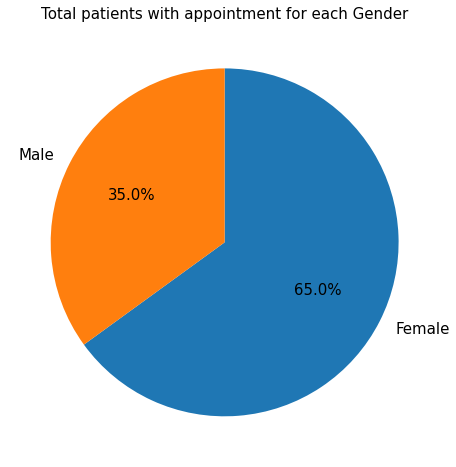

In [81]:
plt.figure(figsize=[10, 8])
base_color = sns.color_palette()[0]
sorted_counts = df_clean['gender'].value_counts()
#sns.countplot(data=df_clean, x='gender', color=base_color, order = type_order, startangle = 90, counterclock = False)
plt.pie(sorted_counts, labels = ['Female', 'Male'], autopct='%1.1f%%', startangle = 90, counterclock = False, textprops={'fontsize': 15})
plt.title('Total patients with appointment for each Gender', fontsize = 15);

### Number of show up and no show up for each gender

There is vastly more number of female patients than male patiens. Hence, more number of female patiens showed up to the appointment than male. However, in terms of percentage, both male and female has similar show-up rate. 

In [47]:
# total show and no-show for each gender
df_clean['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

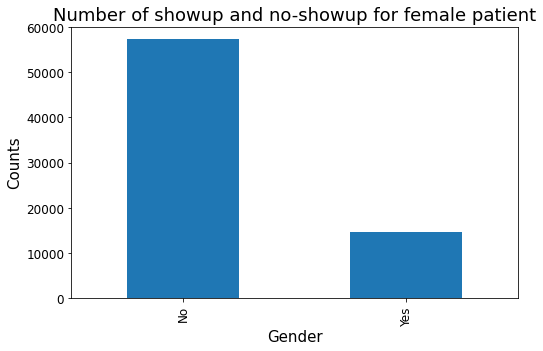

In [97]:
# Show no-show for Female patients
plt.figure(figsize=[8, 5])
df_clean.query('gender == "F"').groupby('no_show').count()['age'].plot(kind = 'bar')
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Number of showup and no-showup for female patient', fontsize = 18);

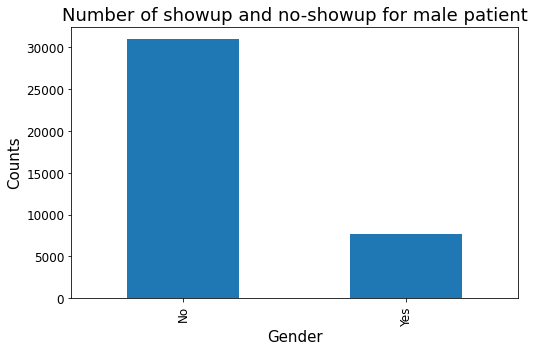

In [95]:
# Show no-show for Male patients
plt.figure(figsize=[8, 5])
df_clean.query('gender == "M"').groupby('no_show').count()['age'].plot(kind = 'bar')
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Number of showup and no-showup for male patient', fontsize = 18);

### Number of show and no-show for various age group

The average age of patients who showedup to the appointment is 37.8 years. Average age of patients who did not showup to the appointment is 34.3 years. It can be seen that toddler between the age 0-10 years and adults of age 60-70 years old have higher percentage of show-up rate. For other age groups, the show-up rate is almost similar. 

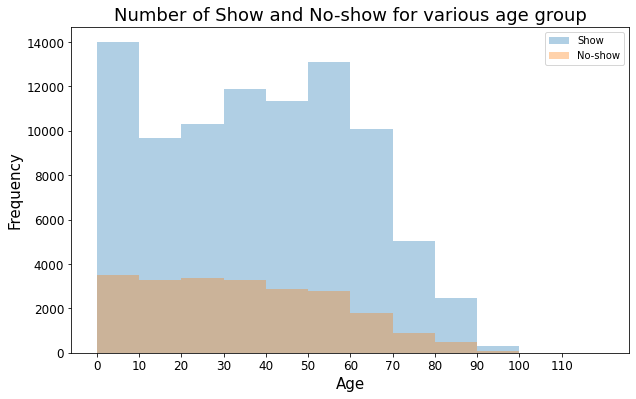

In [104]:
plt.figure(figsize=[10, 6])
bin = np.arange(0, df_clean['age'].max()+10, 10)
tick = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
plt.xticks(tick, tick)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('',fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('')
df_clean[df_clean['no_show'] == 'No']['age'].plot.hist(alpha = 0.35, label = 'Show', legend = True, bins=bin)
df_clean[df_clean['no_show'] == 'Yes']['age'].plot.hist(alpha = 0.35, label = 'No-show', legend = True, bins=bin)
plt.title('Number of Show and No-show for various age group', fontsize = 18);

In [100]:
# Mean age for patient with Show
df_clean[df_clean['no_show'] == 'No']['age'].mean()

37.790504154999034

In [103]:
# Mean age for patient with No_Show
df_clean[df_clean['no_show'] == 'Yes']['age'].mean()

34.31766656212196

### Number of show and no-show for patients who received SMS

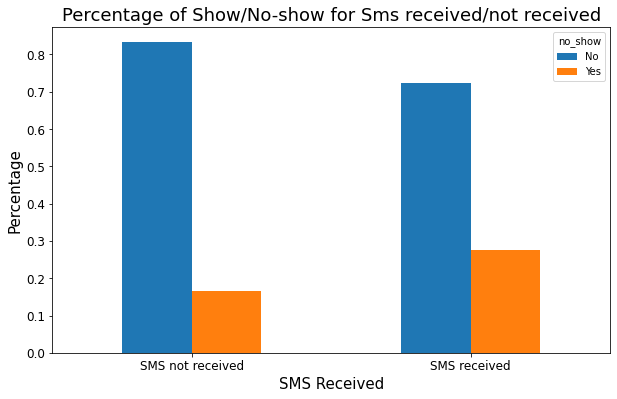

In [106]:
df_clean.groupby('sms_received')['no_show'].value_counts(normalize=True).unstack().plot.bar(figsize=(10,6))
plt.xticks([0, 1], ['SMS not received', 'SMS received'])
plt.ylabel('Percentage', fontsize = 15)
plt.xlabel('SMS Received', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)
plt.title('Percentage of Show/No-show for Sms received/not received', fontsize = 18);

### Number of show and no-show for patients who has prior health condition

<ipython-input-108-449a36f77848>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = df_clean.groupby('no_show')['hipertension', 'diabetes', 'alcoholism', 'handcap'].sum().plot.bar(figsize = [14, 8], rot = 0, width = 0.7);


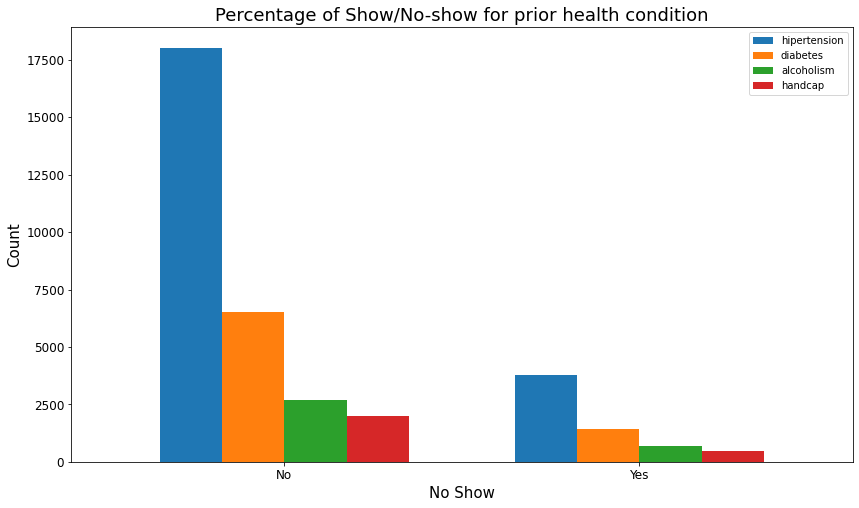

In [108]:
ax = df_clean.groupby('no_show')['hipertension', 'diabetes', 'alcoholism', 'handcap'].sum().plot.bar(figsize = [14, 8], rot = 0, width = 0.7);
plt.ylabel('Count', fontsize = 15)
plt.xlabel('No Show', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)
plt.title('Percentage of Show/No-show for prior health condition', fontsize = 18);